# Análise Exploratória dos Dados

## Setup

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import rcParams
from math import inf
from shutil import copy2

# Matplotlib options
rcParams['figure.figsize'] = (10, 8)
rcParams['axes.grid'] = False
plt.style.use('seaborn-deep')

# Pandas setup
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000) 
pd.set_option('display.max_colwidth', -1) 

In [3]:
# Read file
path = "./Tidy_Entities/"
name = "p1"
filename = name + ".csv"
df = pd.read_csv(path + filename, encoding='utf8')

# Transformations
df["DATE"] =  pd.to_datetime(df["DATE"], format="%Y-%m-%d")
df = df.sort_values("DATE").set_index("DATE")
df.drop(columns=["ENTIDADE"], inplace=True)

## Verificar Informações do Dataset

In [28]:
df.dtypes

ALUMÍNIO                      float64
ARSÊNIO                       float64
BORO                          float64
BÁRIO                         float64
CHUMBO                        float64
CIANETO                       float64
COBALTO                       float64
COBRE                         float64
COLIFORMES_TERMOTOLERANTES    float64
COR_VERDADEIRA                float64
CROMO                         float64
CROMO_HEXAVALENTE             float64
CÁDMIO                        float64
DBO                           float64
DQO                           float64
ESTANHO                       float64
FENOL                         float64
FERRO                         float64
FLUORETO                      float64
FÓSFORO                       float64
LÍTIO                         float64
MANGANÊS                      float64
MERCÚRIO                      float64
MOLIBDÊNIO                    float64
NITROGÊNIO                    float64
NITROGÊNIO_AMONIACAL          float64
NITROGÊNIO_K

In [4]:
print(
    f"\033[31mLinhas: {df.shape[0]}\n"
    f"Colunas: {df.shape[1]}\n\n"
    f"\033[32m-> Features: \n{df.columns.tolist()}\n\n"
    f"\033[34m-> Valores ÚNICOS: \n{df.nunique().sort_values(ascending=False)}\n\n"
    f"\033[36m-> Valores FALTANTES: \n{df.isnull().sum().sort_values(ascending=True)}\033[0"
)

Linhas: 88
Colunas: 34

-> Features: 
['ALUMÍNIO', 'ARSÊNIO', 'BORO', 'BÁRIO', 'CHUMBO', 'CIANETO', 'COBALTO', 'COBRE', 'COLIFORMES_TERMOTOLERANTES', 'COR_VERDADEIRA', 'CROMO', 'CROMO_HEXAVALENTE', 'CÁDMIO', 'DBO', 'DQO', 'ESTANHO', 'FENOL', 'FERRO', 'FLUORETO', 'FÓSFORO', 'LÍTIO', 'MANGANÊS', 'MERCÚRIO', 'MOLIBDÊNIO', 'NITROGÊNIO', 'NITROGÊNIO_AMONIACAL', 'NITROGÊNIO_KJELDAHL', 'NÍQUEL', 'PH', 'PRATA', 'SURFACTANTES', 'SÓLIDOS', 'ÍNDICE_DE_FENÓIS', 'ÓLEOS']

-> Valores ÚNICOS: 
DQO                           86
NITROGÊNIO                    82
SÓLIDOS                       77
DBO                           71
FÓSFORO                       70
ÓLEOS                         65
SURFACTANTES                  63
COLIFORMES_TERMOTOLERANTES    54
ALUMÍNIO                      30
MANGANÊS                      28
NITROGÊNIO_AMONIACAL          27
FERRO                         27
BÁRIO                         25
COR_VERDADEIRA                25
NITROGÊNIO_KJELDAHL           23
COBRE                

### Selecionar features com no mínimo 20% de valores VÁLIDOS || 80% NULOS

In [5]:
# Remove colunas com percentual de nulos acima do limite
aux = pd.DataFrame(df.isnull().sum() / df.shape[0], columns=["NULL_COUNT"])
null_ratio = .80 # limite
features = aux[aux["NULL_COUNT"] <= null_ratio].index.tolist()
filtered = df[features]

print(
    f"{df.shape[1] - df[features].shape[1]} colunas removidas:\n"
    f"{set(df.columns) - set(features)}\n"
)

2 colunas removidas:
{'ÍNDICE_DE_FENÓIS', 'PRATA'}



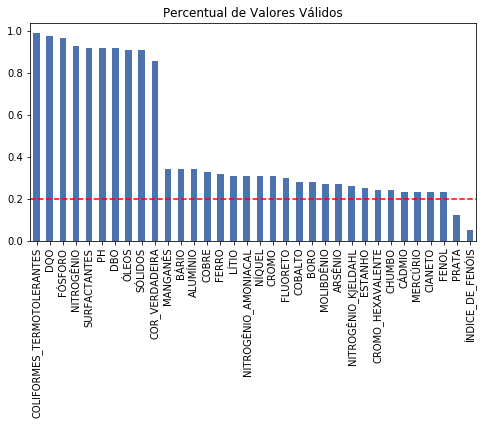

In [6]:
# Ordena os features por quantidade de nulos
threshold = (1 - df.isnull().sum() / df.shape[0]) 
threshold = pd.Series(np.around(threshold.values, 2), index=threshold.index)
threshold = threshold.sort_values(ascending=False)

# Plota o diff dos valores selecionados e excluídos
plt.figure(figsize=(5,2))
threshold.plot.bar(figsize=(8, 4))

# Insere barra horizontal no limiar dos features selecionados
plt.axhline(y=(1 - null_ratio), color="red", linewidth=1.5, linestyle="--")
plt.xticks(rotation=90)
plt.title("Percentual de Valores Válidos");

## Análise de Séries Históricas

### Verificar valores faltantes na série histórica

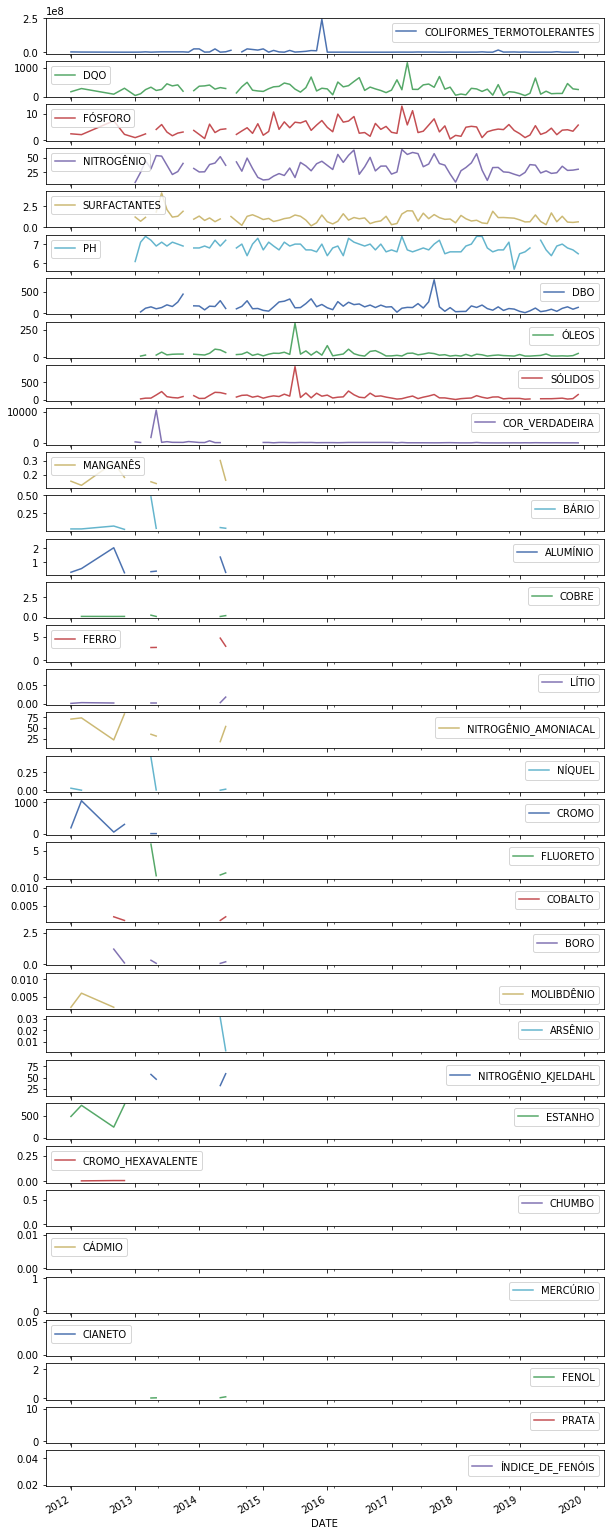

In [7]:
df[threshold.index].plot(subplots=True, figsize=(10, 30));

### Plotar séries históricas agregando por média anual, intervalo de confiança 95%


In [33]:
# Ordenando dados
ordered_columns = filtered.isnull().sum().sort_values(ascending=True).index
df_ordered = filtered[ordered_columns]
df_ordered["YEAR"] = [timestamp.year for timestamp in df_ordered.index]
cols = df_ordered.columns[:-1]
# Removendo ano de 2019 para validação do modelo de predição
validation = df_ordered.query("YEAR == 2019")
df_ordered.drop(labels=validation.index, axis=0, inplace=True)

# Plotando séries históricas
fig, axs = plt.subplots(len(cols), 1)
fig.set_figheight(100)

for key, col in enumerate(cols):
    sns.lineplot(
        data=df_ordered, 
        x="YEAR", 
        y=col, 
        estimator="mean",
        ci=95,
        n_boot=100, 
        ax=axs[key]
    );

,COLIFORMES_TERMOTOLERANTES,DQO,FÓSFORO,NITROGÊNIO,SURFACTANTES,PH,DBO,ÓLEOS,SÓLIDOS,COR_VERDADEIRA,MANGANÊS,ALUMÍNIO,BÁRIO,COBRE,FERRO,CROMO,LÍTIO,NÍQUEL,NITROGÊNIO_AMONIACAL,FLUORETO,COBALTO,BORO,ARSÊNIO,MOLIBDÊNIO,NITROGÊNIO_KJELDAHL,ESTANHO,CHUMBO,CROMO_HEXAVALENTE,CIANETO,FENOL,MERCÚRIO,CÁDMIO,YEAR
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-01,1.986300e+06,170.000000,2.430000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1540,0.267000,0.034000,NaN,NaN,185.000,0.001,0.030,70.200000,NaN,NaN,NaN,0.007,0.002000,NaN,480.00,NaN,NaN,NaN,NaN,NaN,NaN,2012
2012-03-01,1.011200e+06,280.000000,2.110000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1250,0.531000,0.034000,0.024,0.019000,1050.000,0.003,0.003,73.000000,0.041,NaN,NaN,NaN,0.006000,NaN,734.00,NaN,0.0010,NaN,NaN,0.0430,NaN,2012
2012-09-01,2.924000e+05,86.000000,7.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2860,2.030000,0.074000,0.017,NaN,49.000,0.002,NaN,22.600000,NaN,0.002,1.200,NaN,0.002000,NaN,237.00,NaN,0.0040,NaN,NaN,NaN,NaN,2012
2012-11-01,1.119900e+05,290.000000,2.220000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1810,0.230000,0.028000,0.022,0.032000,295.000,NaN,0.003,82.100000,NaN,0.001,0.093,NaN,NaN,NaN,750.00,NaN,0.0040,NaN,NaN,NaN,NaN,2012
2013-01-01,2.419600e+05,40.300000,1.000000,6.700000,1.21,6.1,NaN,NaN,NaN,330.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
2013-02-01,6.131000e+05,100.700000,1.700000,24.425000,0.70,7.1,30.000000,10.00,21.9,140.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
2013-03-01,2.419600e+06,242.800000,2.400000,44.925000,1.17,7.4,116.000000,19.40,42.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
2013-04-01,2.419600e+05,326.750000,NaN,30.400000,NaN,7.2,148.000000,NaN,44.1,1750.000,0.1500,0.309000,0.478000,0.183,2.710000,0.005,0.002,0.450,35.500000,6.200,NaN,0.309,NaN,NaN,57.100000,NaN,NaN,NaN,NaN,0.002000,NaN,0.0100,2013
2013-05-01,1.516380e+06,214.440000,4.060000,53.650000,1.80,6.9,102.800000,19.10,133.3,10540.000,0.1375,0.347000,0.042000,0.017,2.730000,0.004,0.002,0.006,31.400000,0.264,0.002,0.063,0.002,NaN,46.350000,NaN,NaN,NaN,0.011000,0.012500,NaN,NaN,2013


### Identificando outliers nos dados agregados por ano


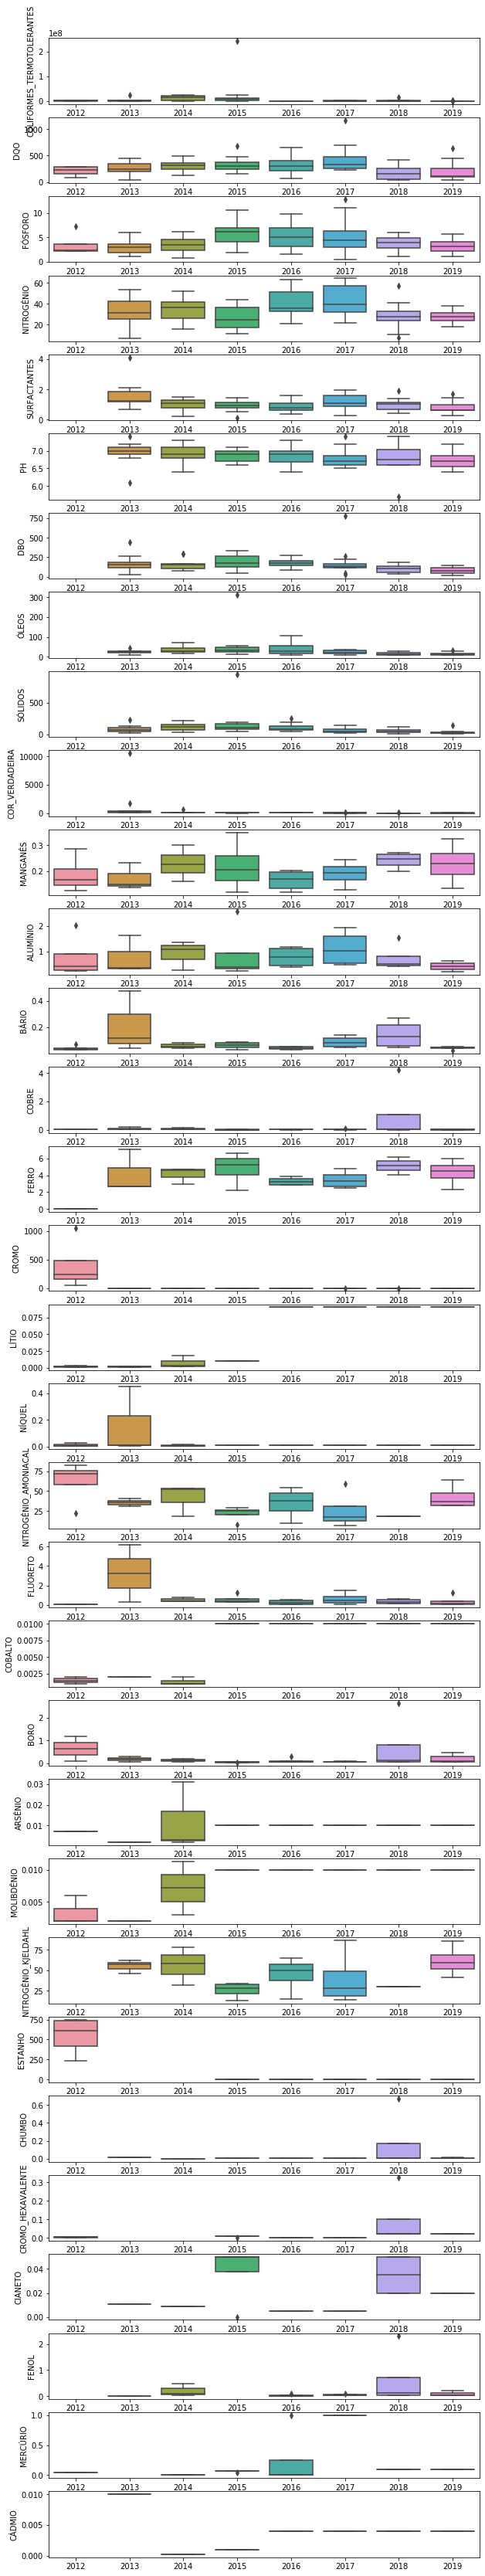

In [10]:
fig, axs = plt.subplots(len(cols), 1)
fig.set_figheight(60)

for key, col in enumerate(cols):
    g = sns.boxplot(
        data=df_ordered, 
        x="YEAR", 
        y=col,  
        ax=axs[key]
    )
    g.set_xlabel("");

## Verificando a Distribuição dos Valores por Função Densidade

### Plotar Histograma e Estimativa de Densidade Kernel (KDE) removendo outliers
<p style="text-align: center">
    <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/3c55a119ef96b0901025a278e397fb8cb47ebc66" alt="equation" />
</p>

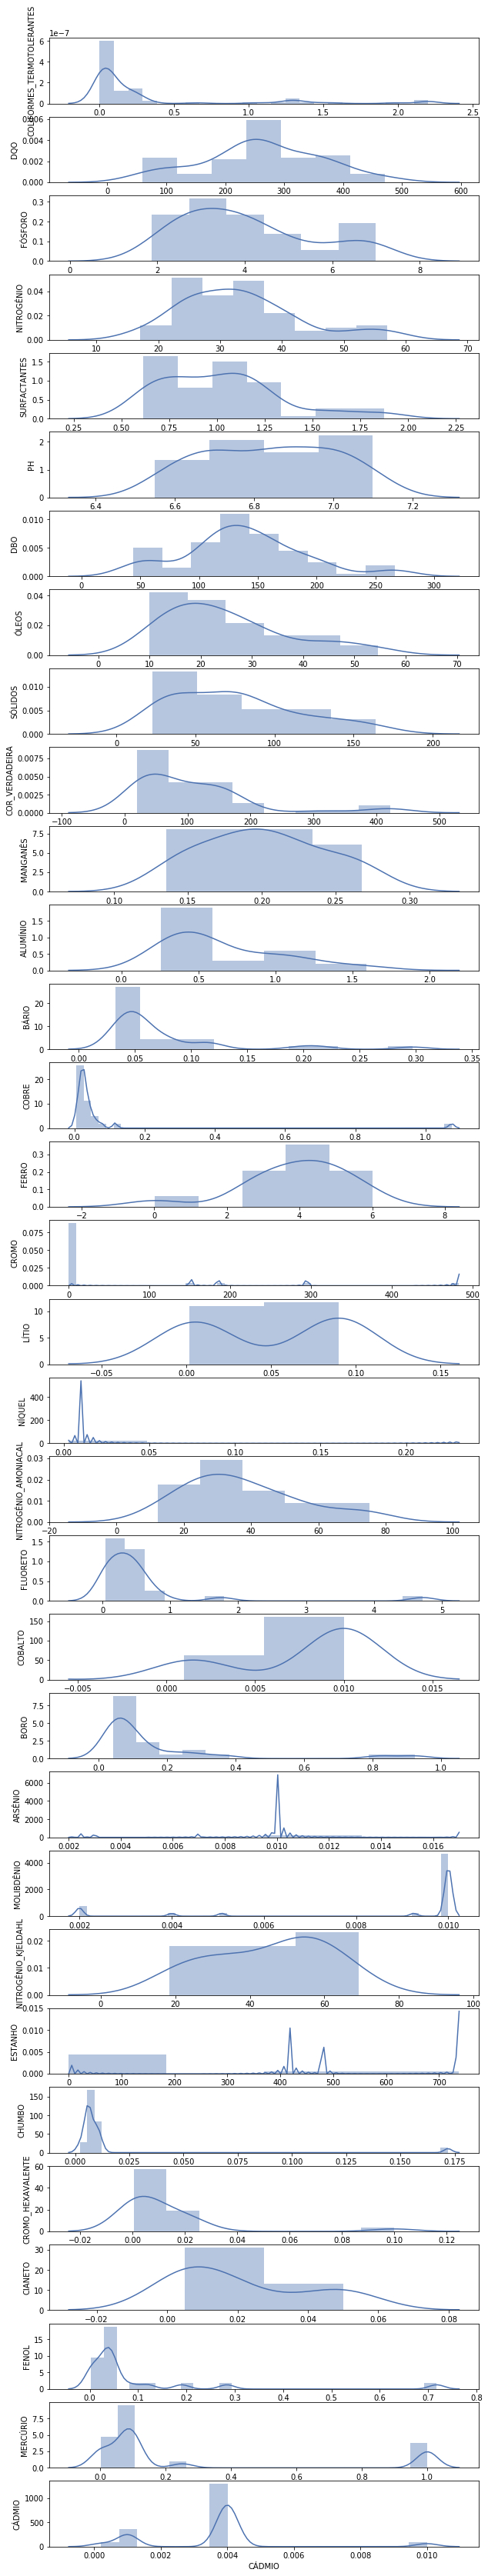

In [17]:
fig, axs = plt.subplots(len(cols), 1)
fig.set_figheight(60)

for key, col in enumerate(cols):
    g = sns.distplot(
        a=df_ordered[col].dropna(),
        hist=True,
        kde=True, 
        ax=axs[key]
    )
    g.set_ylabel(col);

# Modelagem de Features

## Limitando Outliers

### Corrigindo outliers para os limites anuais de intervalo interquartil entre 25 e 75%

In [14]:
# Clipar cada outlier baseado no IQR anual da observação

# df_clipped = pd.DataFrame(columns=df_ordered.columns, index=df_ordered.index)
df_clipped = df_ordered.copy()

lower_boundary = df_ordered.groupby("YEAR").quantile(0.25)
lower_boundary.fillna(-inf, inplace=True)
upper_boundary = df_ordered.groupby("YEAR").quantile(0.75)
upper_boundary.fillna(inf, inplace=True)


years = df_ordered.index.year.unique().tolist()
cols = df_ordered.columns[:-1]

for col in cols:
    series = []
    for year in years:
        partial = df_ordered[df_ordered.index.year == year][col].clip(
            lower=lower_boundary[lower_boundary.index == year][col].values[0],
            upper=upper_boundary[upper_boundary.index == year][col].values[0]
        )

        series.append(partial)

    flattened = [val for sublist in series for val in sublist]
    df_clipped[col] = flattened

# Plotar boxplot anual de cada coluna
fig, axs = plt.subplots(len(cols), 1)
fig.set_figheight(60)

for key, col in enumerate(cols):
    g = sns.boxplot(
        data=df_clipped, 
        x="YEAR", 
        y=col,  
        ax=axs[key]
    )
    g.set_xlabel("");

,COLIFORMES_TERMOTOLERANTES,DQO,FÓSFORO,NITROGÊNIO,SURFACTANTES,PH,DBO,ÓLEOS,SÓLIDOS,COR_VERDADEIRA,MANGANÊS,ALUMÍNIO,BÁRIO,COBRE,FERRO,CROMO,LÍTIO,NÍQUEL,NITROGÊNIO_AMONIACAL,FLUORETO,COBALTO,BORO,ARSÊNIO,MOLIBDÊNIO,NITROGÊNIO_KJELDAHL,ESTANHO,CHUMBO,CROMO_HEXAVALENTE,CIANETO,FENOL,MERCÚRIO,CÁDMIO,YEAR
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-01,1254975.0,170.0,2.4300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.15400,0.26700,0.0340,NaN,NaN,185.00,0.0015,0.0165,70.200,NaN,NaN,NaN,0.007,0.002,NaN,480.00,NaN,NaN,NaN,NaN,NaN,NaN,2012
2012-03-01,1011200.0,280.0,2.1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.14675,0.53100,0.0340,0.0230,0.02225,483.75,0.0025,0.0030,73.000,0.041,NaN,NaN,NaN,0.004,NaN,734.00,NaN,0.0025,NaN,NaN,0.043,NaN,2012
2012-09-01,292400.0,149.0,3.6500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.20725,0.90575,0.0440,0.0195,NaN,151.00,0.0020,NaN,58.300,NaN,0.00175,0.92325,NaN,0.002,NaN,419.25,NaN,0.0040,NaN,NaN,NaN,NaN,2012
2012-11-01,247297.5,282.5,2.2200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.18100,0.25775,0.0325,0.0220,0.02875,295.00,NaN,0.0030,75.275,NaN,0.00125,0.36975,NaN,NaN,NaN,738.00,NaN,0.0040,NaN,NaN,NaN,NaN,2012
2013-01-01,520315.0,197.7,1.8750,25.075,1.21,6.9,NaN,NaN,NaN,330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013


### Série Histórica Corrigida

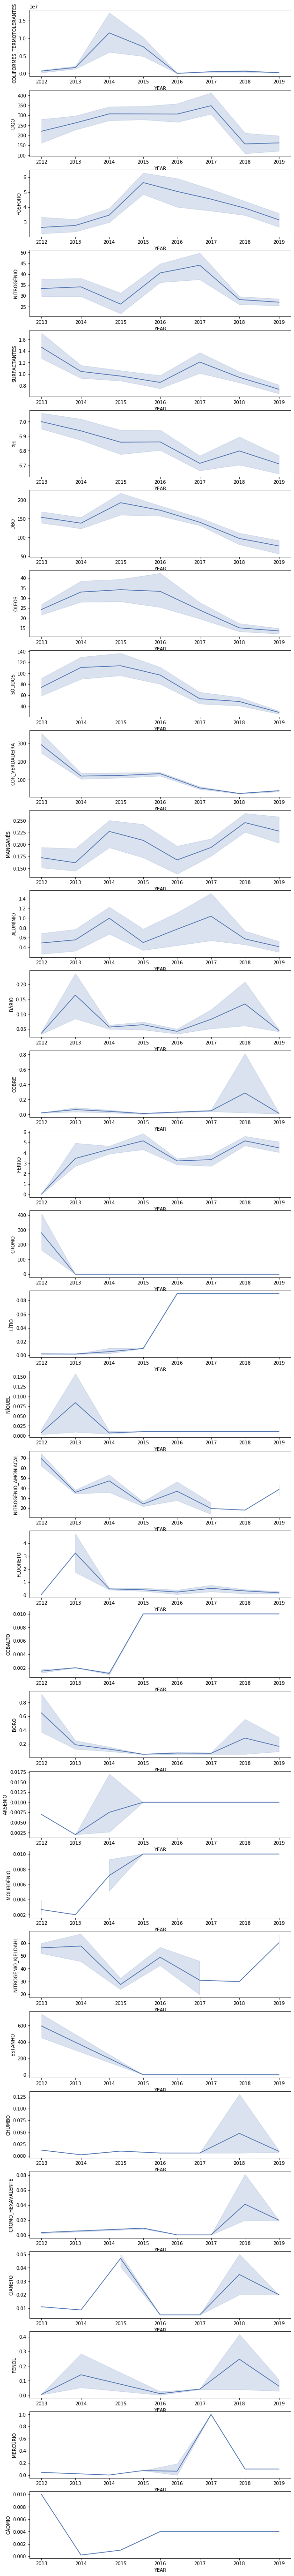

In [16]:
fig, axs = plt.subplots(len(cols), 1)
fig.set_figheight(100)

for key, col in enumerate(cols):
    sns.lineplot(
        data=df_clipped, 
        x="YEAR", 
        y=col, 
        estimator="mean",
        ci=95,
        n_boot=100, 
        ax=axs[key]
    );

## Imputando média trimestral nos dados faltantes

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(
    missing_values=nan, 
    n_neighbors=2, 
    weights='uniform', 
    metric='nan_euclidean', 
    copy=True
)

imputer.fit()

### Verificando Normalidade dos Dados Modelados
Realizando o teste Shapiro-Wilk para verificar se os dados são provenientes de uma distribuição normal

In [27]:
from scipy.stats import shapiro 

test = []

for key, col in enumerate(cols): 
    test.append(shapiro(df_clipped[col].values))
shapiro(df_clipped[cols[1]].dropna().values)

(0.9732854962348938, 0.07148288190364838)

In [ ]:
copy2("EDA.ipynb", f"./EDA/EDA_{name}.ipynb")